## Day 11

https://adventofcode.com/2025/day/11

In [10]:
import networkx as nx

def read_input_10(filename):
    with open(filename) as f:
        G = nx.DiGraph()
        for l in f.readlines():
            n = l.strip("\n").split(": ")
            for o in n[1].split(" "):
                G.add_edge(n[0],o)
    return G

In [11]:
def part1(filename):
    G = read_input_10(filename)
    return sum([ 1 for p in nx.all_simple_paths(G,"you","out") ])

In [12]:
print("Test 1:", part1("examples/example11_1.txt"))
print("Part 1:", part1("AOC2025inputs/input11.txt"))

Test 1: 5
Part 1: 477


In [13]:
def count_paths(G, s, t):
    '''
    Count the number of directed paths from node s to node t
    using topological sorting and dynamic programming
    '''

    # Compute a topological ordering of the nodes.
    # https://en.wikipedia.org/wiki/Topological_sorting
    # This guarantees that all edges go from left to right in the order
    # which allows to safely do dynamic programming without worrying about cycles
    order = list(nx.topological_sort(G))

    # dp[u] = number of distinct paths from s to u
    # Initialize all counts to zero...
    dp = {node: 0 for node in G}
    # ... except for the start node, which has one trivial path to itself
    dp[s] = 1

    # Process nodes in topological order
    # When we reach a node u, dp[u] already contains the total number
    # of paths from s to u. We add that number to each successor v,
    # because every path to u can be extended to v
    for u in order:
        for v in G.successors(u):
            dp[v] += dp[u]

    # The number of paths from s to t is now stored in dp[t]
    return dp[t]

In [14]:
def part1fast(filename):
    G = read_input_10(filename)
    return count_paths(G, "you","out")

In [15]:
print("Test 1:", part1fast("examples/example11_1.txt"))
print("Part 1:", part1fast("AOC2025inputs/input11.txt"))

Test 1: 5
Part 1: 477


In [16]:
def part2(filename):
    G = read_input_10(filename)

    # Segment path counts
    n_svr_fft = count_paths(G, "svr", "fft")
    n_svr_dac = count_paths(G, "svr", "dac")

    n_fft_dac = count_paths(G, "fft", "dac")
    n_dac_fft = count_paths(G, "dac", "fft")

    n_dac_out = count_paths(G, "dac", "out")
    n_fft_out = count_paths(G, "fft", "out")

    # Total paths svr -> out including fft and dac
    total = 0

    # Case 1: svr -> fft -> dac -> out
    if n_fft_dac > 0:
        total += n_svr_fft * n_fft_dac * n_dac_out

    # Case 2: svr -> dac -> fft -> out
    if n_dac_fft > 0:
        total += n_svr_dac * n_dac_fft * n_fft_out

    return total

In [17]:
print("Test 2:", part2("examples/example11_2.txt"))
print("Part 2:", part2("AOC2025inputs/input11.txt"))

Test 2: 2
Part 2: 383307150903216


In [27]:
G = read_input_10("AOC2025inputs/input11.txt")

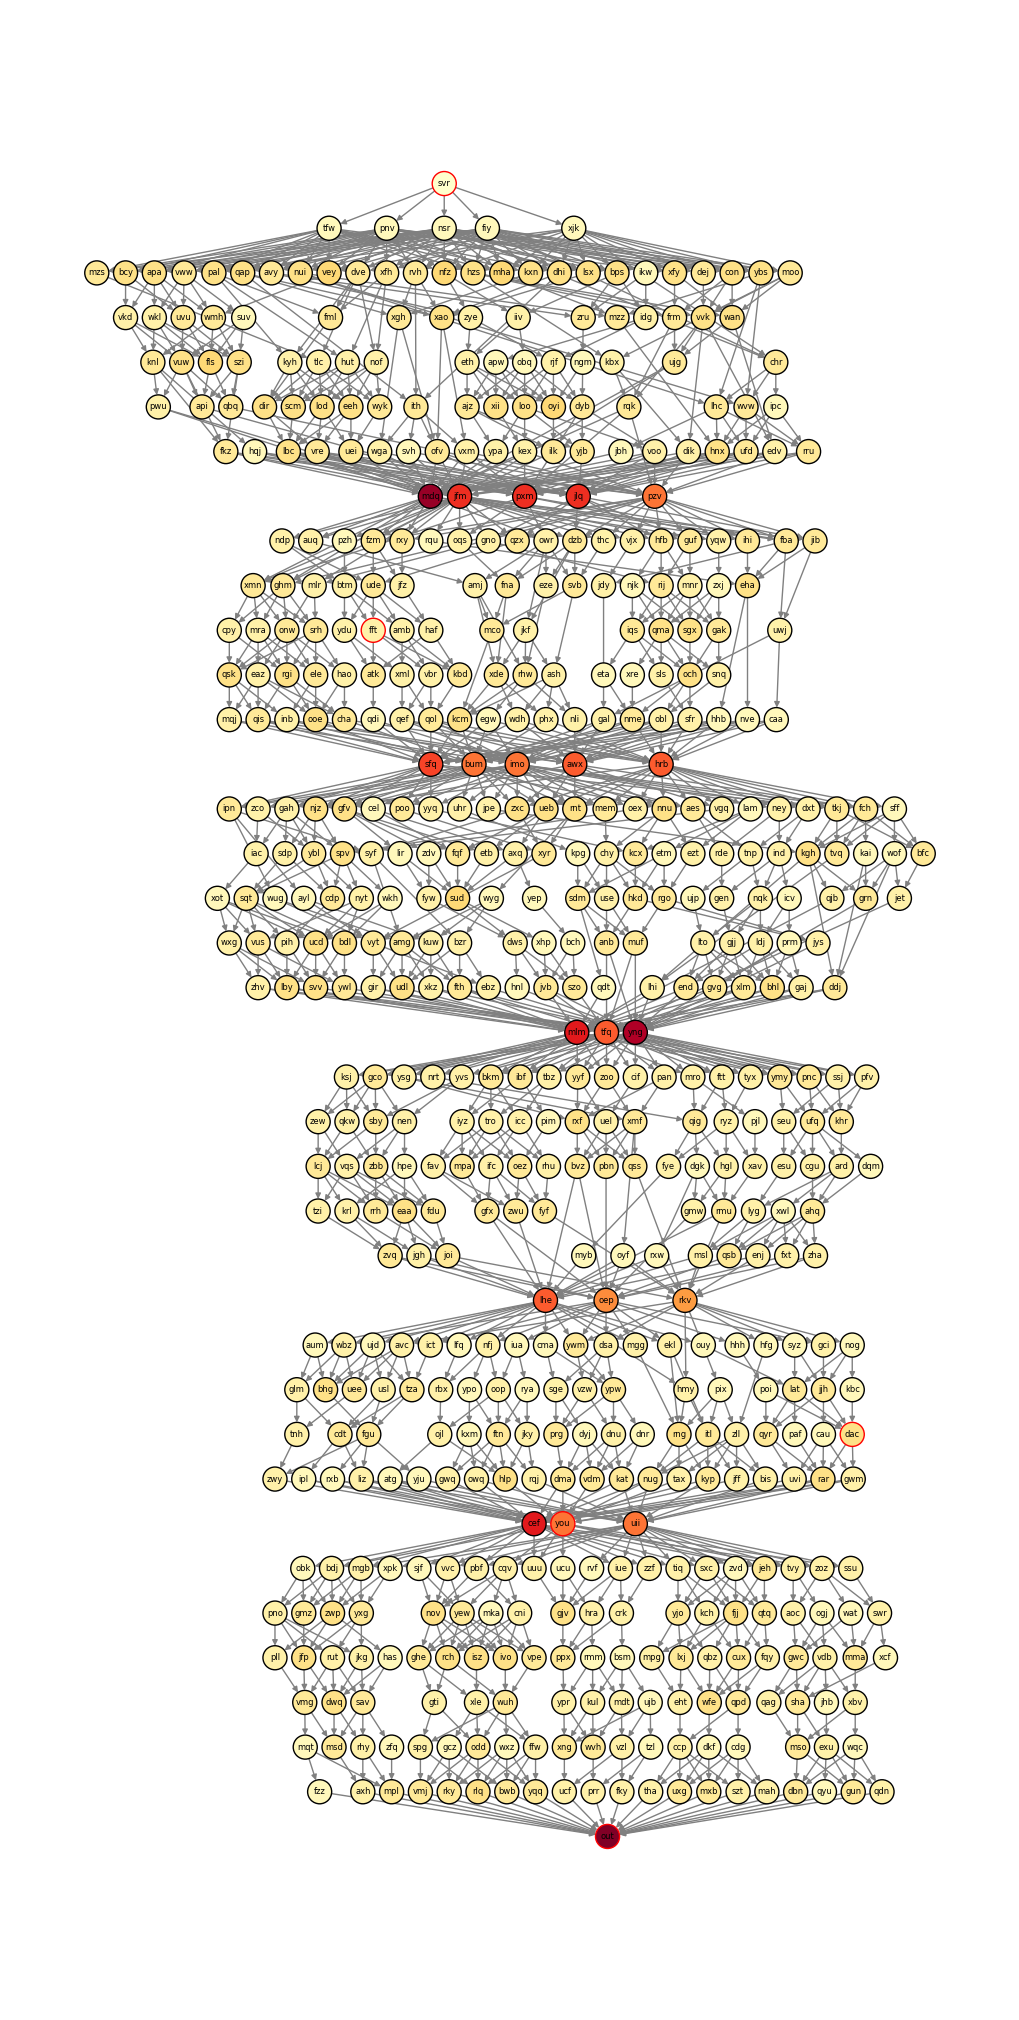

In [73]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

highlight_nodes = {"svr", "fft", "dac", "out", "you"}

G.graph['graph'] = {
    'ranksep': '8',
    'nodesep': '0.05'
}

pos = graphviz_layout(G, prog="dot")

# Compute node colors based on incoming connections
in_degrees = dict(G.in_degree())
max_deg = max(in_degrees.values()) if max(in_degrees.values()) > 0 else 1

node_colors = []
node_edge_colors = []
node_sizes = []
for n in G.nodes():
    node_colors.append(plt.cm.YlOrRd(in_degrees[n] / max_deg)) # Color proportional to incoming connections
    if n in highlight_nodes:
        node_edge_colors.append("red")
        node_sizes.append(300)
    else:
        node_edge_colors.append("black")
        node_sizes.append(300)

plt.figure(figsize=(10, 20))
nx.draw(
    G, pos,
    with_labels=True,
    labels={n: n for n in G.nodes()},
    font_size=6,
    node_size=node_sizes,
    node_color=node_colors,
    edgecolors=node_edge_colors,
    linewidths=1,
    arrowsize=8,
    arrowstyle="-|>",
    edge_color="grey"
)

plt.savefig("visualisation/day11.png", dpi=300, bbox_inches='tight')
plt.show()